In [145]:
import pandas as pd
import os
os.getcwd()
os.chdir('C:\\Users\\user\\Desktop\\타이타닉')

train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

## 데이터 딕셔너리
- survived : 생존=1, 죽음=0
- pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

### 데이터 관찰

In [12]:
train.shape

(891, 12)

In [13]:
test.shape

(418, 11)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# train 데이터 총 891개
# embarked는 탑승장소. null값이 2개밖에 안되므로 최빈값으로 채워야겠다
# Cabin은 결측치가 더 많으므로 학습에 큰 영향을 주지 못할수도....
# Age는 177개나 결측치 어떻게 처리해야될까용

## 데이터 시각화

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #플롯의 seaborn 기본값 설정

PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
sibsp : 함께 탑승한 형제 또는 배우자 수
parch : 함께 탑승한 부모 또는 자녀 수
cabin : 선실번호
Embarked : 탑승장소

- 성별 살아남은 수
- 나이별 살아남은 수
- 클래스별 생존자수

In [19]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',figsize=(10,5))

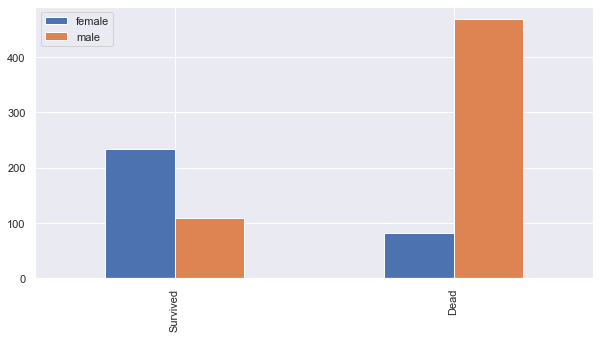

In [20]:
bar_chart('Sex')

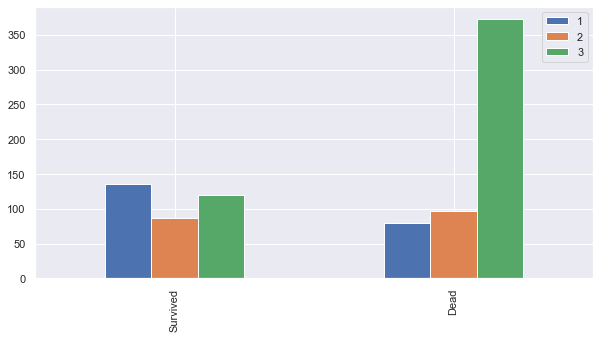

In [22]:
bar_chart('Pclass')

In [29]:
def stacked_bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked='True',figsize=(10,5))

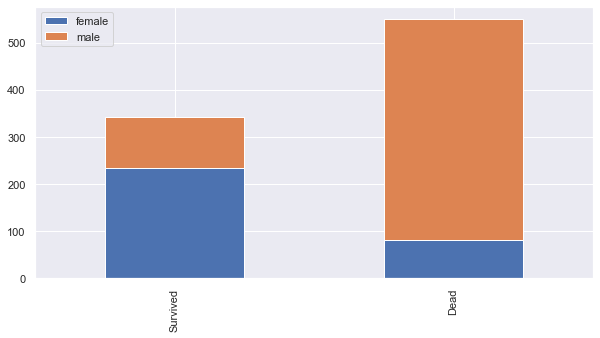

In [32]:
stacked_bar_chart('Sex')

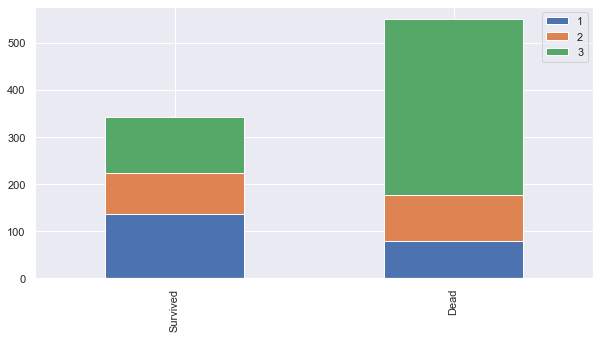

In [33]:
stacked_bar_chart('Pclass')

In [57]:
feature = 'Sex'
female = train[train['Sex']=='female']['Survived'].value_counts()
male = train[train['Sex']=='male']['Survived'].value_counts()
df=pd.DataFrame([female,male])
df.index = ['female', 'male']
df

0    1
female   81  233
male    468  109

<AxesSubplot:>

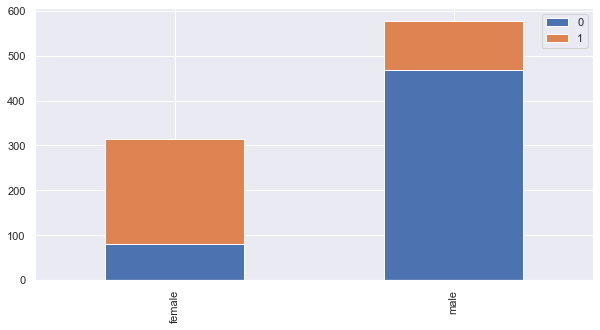

In [58]:
df.plot(kind='bar',stacked='True',figsize=(10,5))

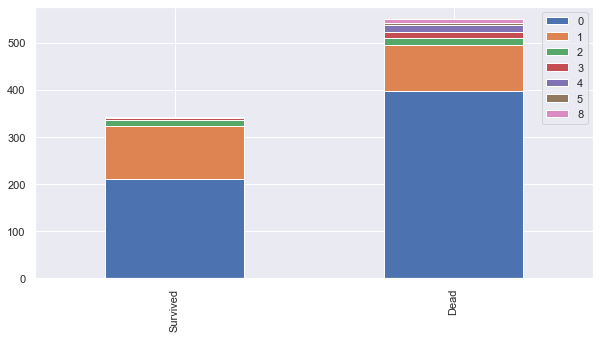

In [60]:
# sibsp : 함께 탑승한 형제 또는 배우자 수
stacked_bar_chart('SibSp')

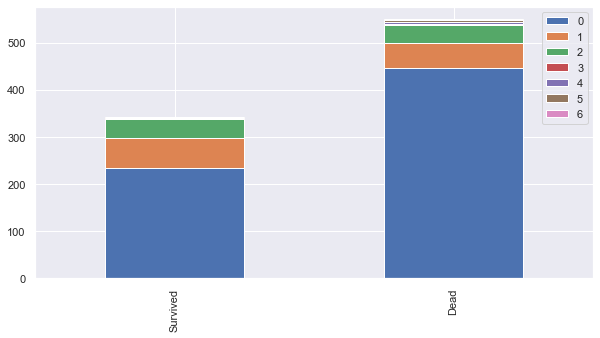

In [63]:
# parch : 함께 탑승한 부모 또는 자녀 수
stacked_bar_chart('Parch')

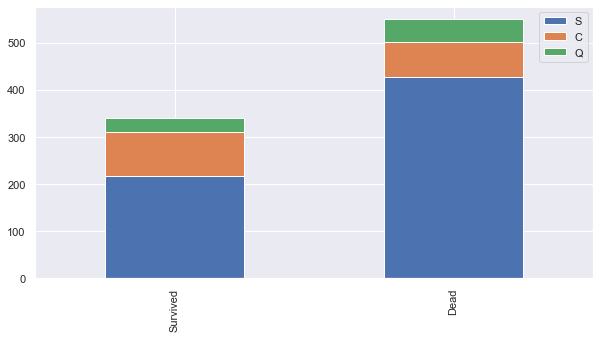

In [66]:
stacked_bar_chart('Embarked')

In [71]:
train.loc[:,'Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [72]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [146]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.',expand=False)

In [147]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Lady          1
Sir           1
Mme           1
Ms            1
Countess      1
Jonkheer      1
Capt          1
Name: Title, dtype: int64

In [148]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.',expand=False)
# train의 series중 name에서 대문자로 시작하여 이후에는 소문자가 나열되며
# .을 만나면 탐색을 멈춰 string을 추출한다
# 결과를 Title에 저장한다

In [149]:
train.drop('Name',axis=1,inplace=True)

In [150]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked Title  
0         A/5 21171   7.2500   NaN        S    Mr  
1          PC 17599  71.2833   C85        C   Mrs  
2  STON/O2. 3101282   7.9250   NaN        S  Miss  
3            113803  53.1000  C123        S   Mrs  
4            373450   8.0500   NaN        S    Mr

In [151]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [152]:
train.loc[:,'Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [153]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [154]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      0  
1          PC 17599  71.2833   C85        C      2  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      2  
4            373450   8.0500   NaN        S      0

In [85]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

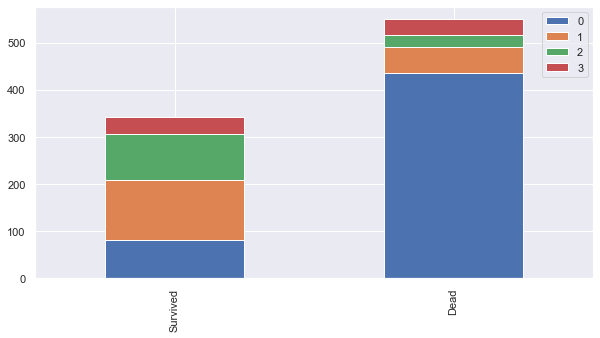

In [86]:
# Mr":0, "Miss":1, "Mrs":2
bar_chart('Title')

In [155]:
# 데이터셋에서 불필요한 feature 삭제
test.drop('Name',axis=1,inplace=True)

In [156]:
test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  34.5      0      0   330911   7.8292   NaN   
1          893       3  female  47.0      1      0   363272   7.0000   NaN   
2          894       2    male  62.0      0      0   240276   9.6875   NaN   
3          895       3    male  27.0      0      0   315154   8.6625   NaN   
4          896       3  female  22.0      1      1  3101298  12.2875   NaN   

  Embarked  Title  
0        Q    0.0  
1        S    2.0  
2        Q    0.0  
3        S    0.0  
4        S    2.0

In [157]:
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map({"male":0,"female":1})

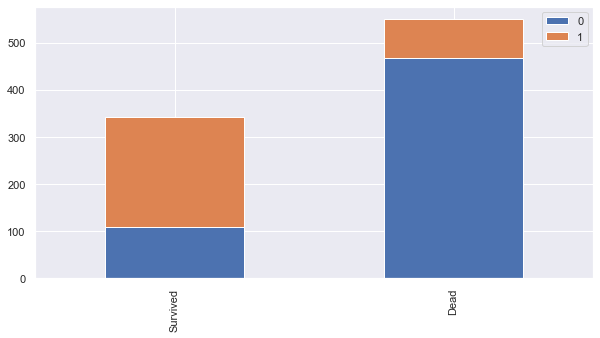

In [94]:
bar_chart('Sex')

## Age missing data 채우기
- Mr, Miss, Mise, Mrs 각각의 평균 구해서 채워주기

In [158]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

### Seaborn- facetGrid
- 다양한 범주형 값을 가지는 데이터를 시각화하는데 좋은 방법
- 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯 제작
- 각 서브 플롯에 적용할 그래프 종류를 map() 메서드를 이용하여 그리드 객체에 전달

1. FacetGrid에 데이터프레임과 구분할 row, col, hue 등을 전달해 객체 생성.
    hue 옵션으로 bar 구분이 가능하며, xtick, ytick, xlabel, ylabel, legend 등이 추가적인 코딩 작업없이 자동으로 세팅된다.
2. 객체(facet)의 map 메서드에 그릴 그래프의 종류와 종류에 맞는 컬럼 전달.
    예시 - distplot의 경우 하나의 컬럼 // scatter의 경우 두개의 컬럼

### 커널 밀도 추정(KDE: Kernel Density Estimator)그래프
- data: pandas의 DataFrame, 파이썬의 list, numpy의 배열 등 시각화시키고 싶은 데이터 세트
- shade: 곡선 아래의 공간을 음영 처리할지 결정 (True/False)

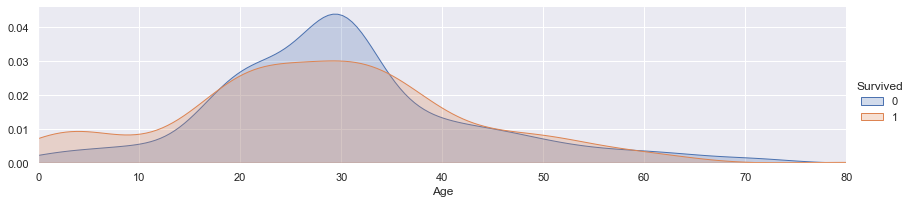

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
# FacetGrid : 다중 플랏 그리드를 구성 (도화지를 나눔 ) , aspect:그래프넓이조절
facet = sns.FacetGrid(train, hue="Survived", aspect=4)

facet.map(sns.kdeplot, 'Age', shade=True)
#축 범위 설정: x범위 0부터 Age의 max값까지
facet.set(xlim=(0,train['Age'].max())) 
#범례 추가
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

(0.0, 20.0)

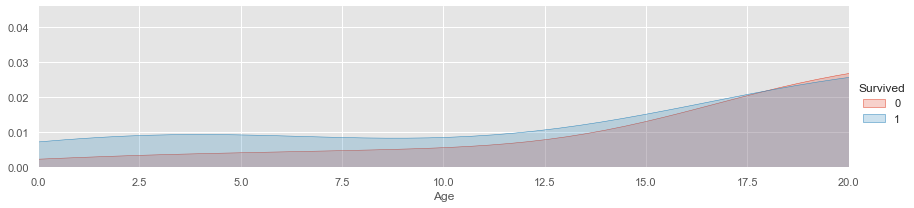

In [102]:
# 나이대별로 잘라서 그래프 확대출력
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20.0, 30.0)

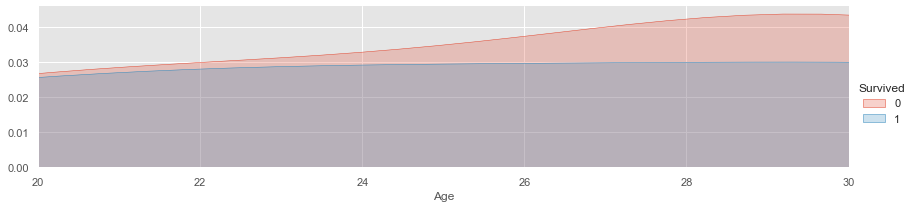

In [100]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

(30.0, 40.0)

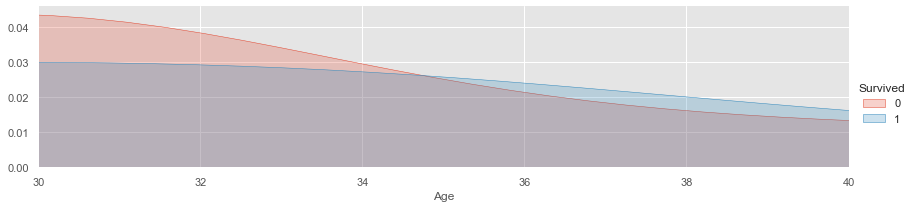

In [101]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

(40.0, 60.0)

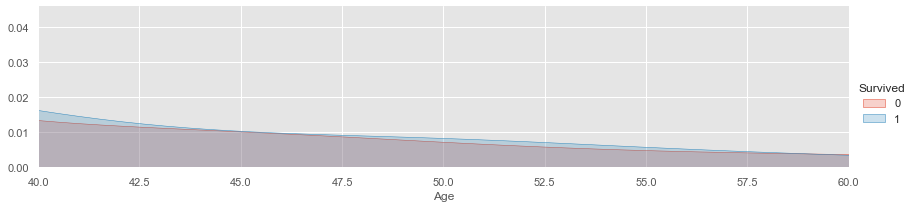

In [103]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60.0, 80.0)

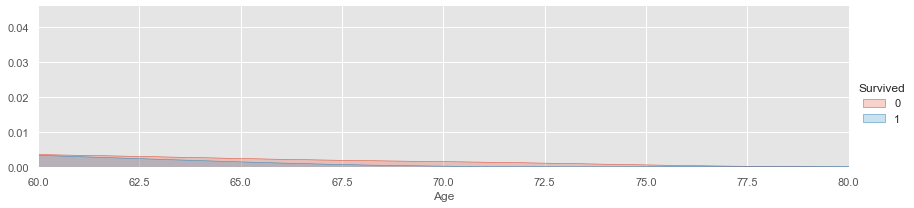

In [107]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        417 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


In [159]:
# 나이 범주형으로 변환
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <=16, 'Age']=0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 62), 'Age'] = 4

In [165]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

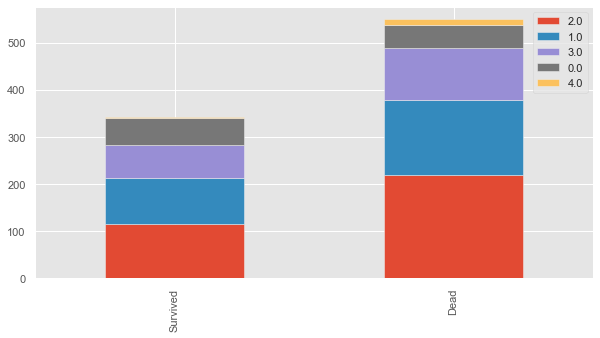

In [166]:
bar_chart('Age')

<AxesSubplot:>

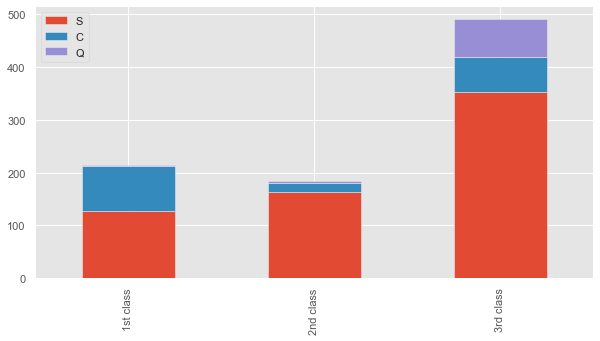

In [167]:
# 도시별 부유한 사람과 가난한사람의 차이(Embarked:탑승지)
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [168]:
# Embarked가 적혀있지 않은 데이터는 S로 처리한다
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [169]:
embarked_mapping={'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [170]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin  Embarked  Title  
0   7.2500   NaN         0      0  
1  71.2833   C85         1      2  
2   7.9250   NaN         0      1  
3  53.1000  C123         0      2  
4   8.0500   NaN         0      0

In [171]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [172]:
#티켓 가격은 클래스과 관련이 높다.
#각 클래스의 티켓 가격 가운데 값을 티켓 가격의 missing value에 넣어주겠다.
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

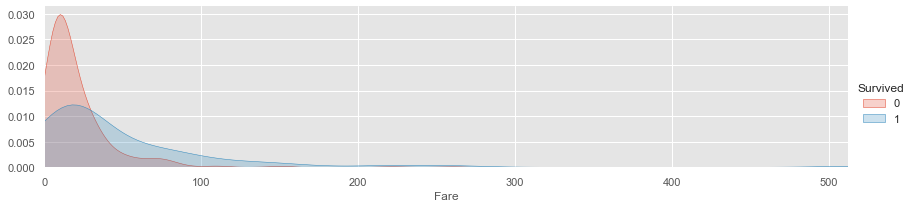

In [173]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()
# 비싼 티켓을 구매한 사람은 생존률이 높다

(0.0, 20.0)

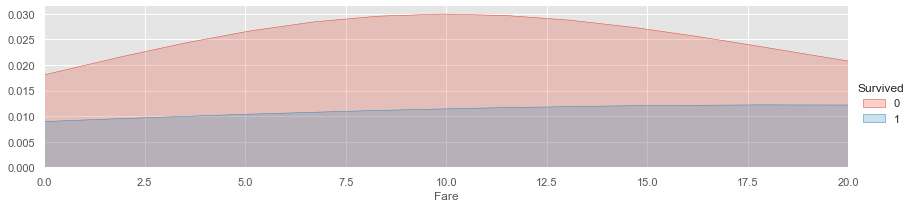

In [174]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

(0.0, 30.0)

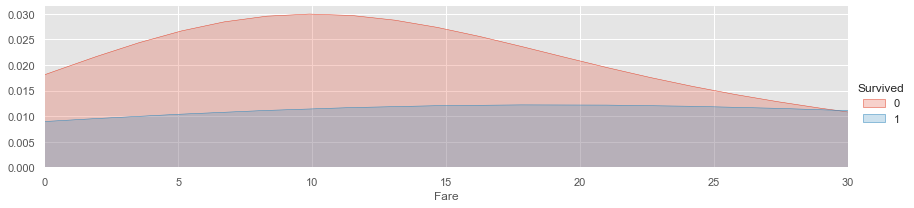

In [175]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

(0.0, 512.3292)

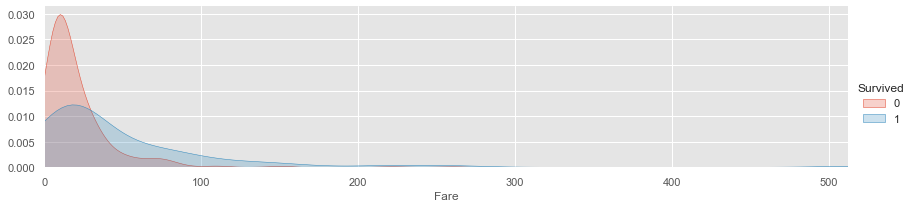

In [176]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0) # 티켓의 개수가 0이 되는 티켓의 가격

In [177]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [178]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare Cabin  Embarked  Title  
0   0.0   NaN         0      0  
1   2.0   C85         1      2  
2   0.0   NaN         0      1  
3   2.0  C123         0      2  
4   0.0   NaN         0      0

In [179]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
E101           3
              ..
C101           1
D11            1
E46            1
D49            1
C106           1
Name: Cabin, Length: 147, dtype: int64

In [180]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

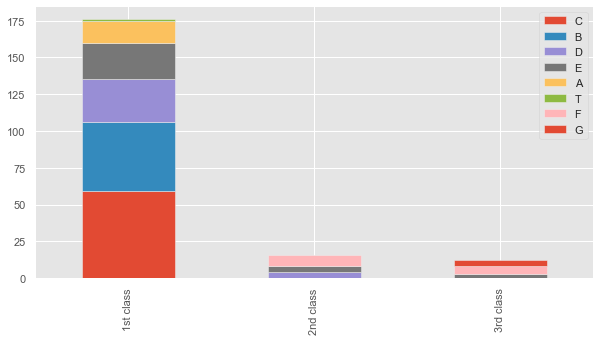

In [181]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [182]:
# 1등급에는 ABCDET, 2등급에는 DEF, 3등급은 EFG로 구성되어 있다.
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

소수점을 사용하는 이 방법을 feature scaling이라고 하는데, 머신러닝 classifier는 숫자를 사용하고 계산을 할 때 보통 euclidean distance를 사용한다. 숫자의 범위가 비슷하지 않으면 큰 거리에 있는 것을 조금 더 중요하게 생각할 수 있다. 예를들면 남자와 여자는 0과 1로 구분해 놨는데 Fare가 10달러와 20달러 티켓이 있다면 이것은 3등급으로 같다. 남자와 여자의 차이는 1이고 10달러와 20달러의 차이는 10이니깐 우리가 같은 range를 주지 않을 경우 머신러닝 classifier는 남자와 여자의 차이보다 요금의 차이를 크게 인식한다. 그래서 범위를 비슷하게 주기 위해서 소수점을 사용했다.

In [183]:
# Cabin의 missing field는 1등급 2등급 3등급 클래스와 밀접한 관계
# 각 클래스별 cabin의 중간값을 missing value에 넣어주도록 한다.
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

## FamilySize
함께 동승한 부모님과 아이들의 수와 형제와 배우자의 수의 사망률에 대해 관계가 유사하였고, 궁금한 점은 혼자 탔는지 함께 탔는지가 궁금하기때문에 SibSb 데이터와 Parch 데이터를 합쳐 하나의 값을 만드는 것도 괜찮을 것 같다.

In [186]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

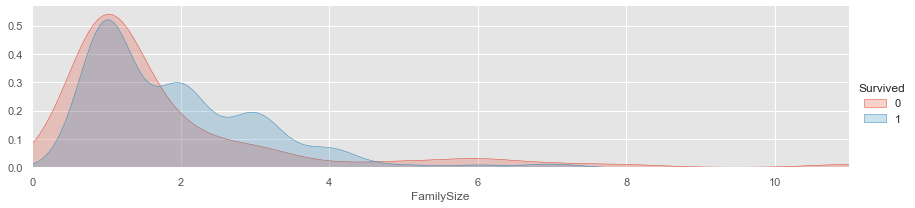

In [187]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

In [188]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [189]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  FamilySize  
0   0.0    2.0         0      0         0.4  
1   2.0    0.8         1      2         0.4  
2   0.0    2.0         0      1         0.0  
3   2.0    0.8         0      2         0.4  
4   0.0    2.0         0      0         0.0

In [190]:
# Ticket 데이터와 SibSp, Parch정보 빼주기
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [191]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [192]:
train_data.head(10)

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0       3    0  1.0   0.0    2.0         0      0         0.4
1       1    1  3.0   2.0    0.8         1      2         0.4
2       3    1  1.0   0.0    2.0         0      1         0.0
3       1    1  2.0   2.0    0.8         0      2         0.4
4       3    0  2.0   0.0    2.0         0      0         0.0
5       3    0  2.0   0.0    2.0         2      0         0.0
6       1    0  3.0   2.0    1.6         0      0         0.0
7       3    0  0.0   1.0    2.0         0      3         1.6
8       3    1  2.0   0.0    2.0         0      2         0.8
9       2    1  0.0   2.0    1.8         1      2         0.4

## decision Tree model

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train['Survived'],test_size=0.2,random_state=42)
DT = DecisionTreeClassifier(max_depth=100)
model = DT.fit(X_train, y_train)
pred = model.predict(X_test)

In [197]:
print("훈련 세트 정확도: {:.3f}".format(DT.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(DT.score(X_test, y_test)))

훈련 세트 정확도: 0.902
테스트 세트 정확도: 0.810


## RandomForestClassifier

In [200]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rf_clf = RandomForestClassifier()
model = rf_clf.fit(X_train, y_train)
pred = model.predict(X_test)

In [201]:
print("훈련 세트 정확도: {:.3f}".format(rf_clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rf_clf.score(X_test, y_test)))

훈련 세트 정확도: 0.902
테스트 세트 정확도: 0.844
